# Orthogonality in Potapov modes

The modes of a system will not always be orthogonal because some of the signal leaks out of the system. Let's use the Potapov analysis for a specific example to determine when the orthogonality approximation can be made.

The example used here is example 3 in our code, which corresponds to figure 7 in our paper. This example is formed by two inter-linked cavities with two inputs and outputs.

In [63]:
import Roots
import Potapov
import Examples
import Time_Sims
import functions
import tests

import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def contour_plot(Mat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(abs(Mat), interpolation='nearest')
    fig.colorbar(cax)
    plt.show()

In [30]:
def run_example3(r1 = 0.999,r2=0.4, r3 = 0.999):
    Ex = Examples.Example3(r1=r1,r2=r2,r3=r3,max_freq=50.,max_linewidth=35.)
    Ex.run_Potapov()
    E = Ex.E
    roots = Ex.roots
    M1 = Ex.M1
    delays = Ex.delays
    modes = functions.spatial_modes(roots,M1,E)
    Mat = functions.make_normalized_inner_product_matrix(roots,modes,delays)
    #contour_plot(Mat)
    
    #for root,mode in zip(roots,modes):
    #    print root,mode
    return Mat

In [31]:
rs = [.01,0.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99,.999]

## Varying r1 and r3 -- the input-output mirrors

In [33]:
Ms = {}
for r in rs:
    Ms[r] = run_example3(r1=r,r3=r)

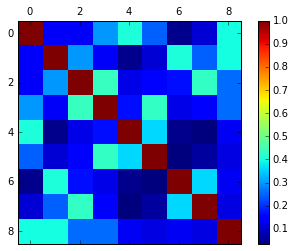

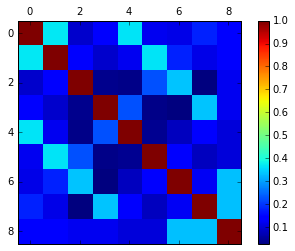

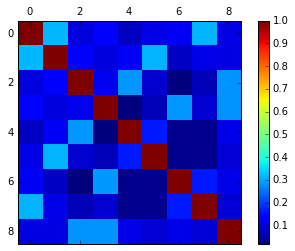

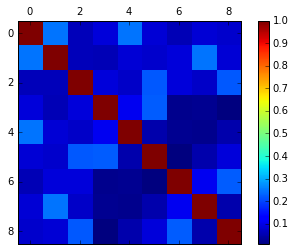

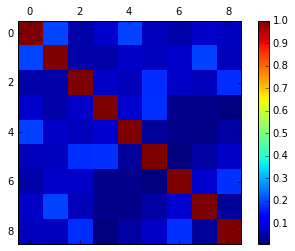

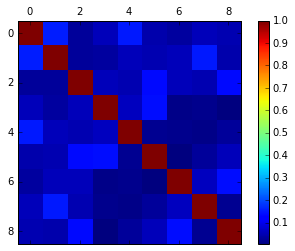

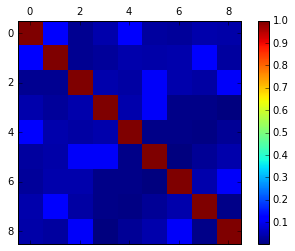

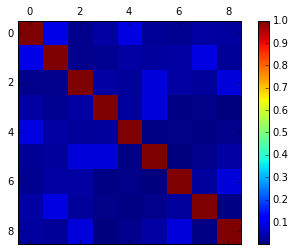

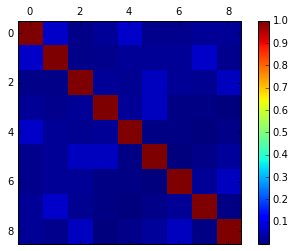

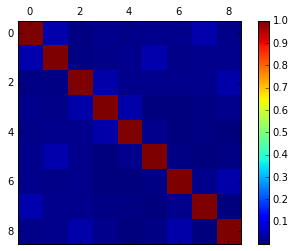

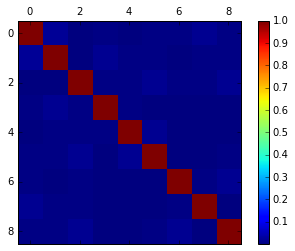

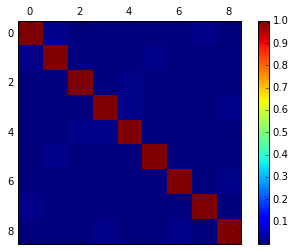

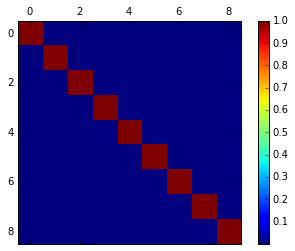

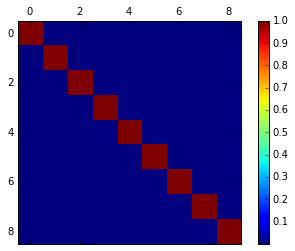

In [29]:
for r in rs:
    contour_plot(Ms[r])

In [34]:
err = {}
for r in rs:
    dim = Ms[r].shape[-1]
    err[r] =  sum( (Ms[r] - np.matrix(np.eye(dim)))**2 ).real/(dim*(dim-1))

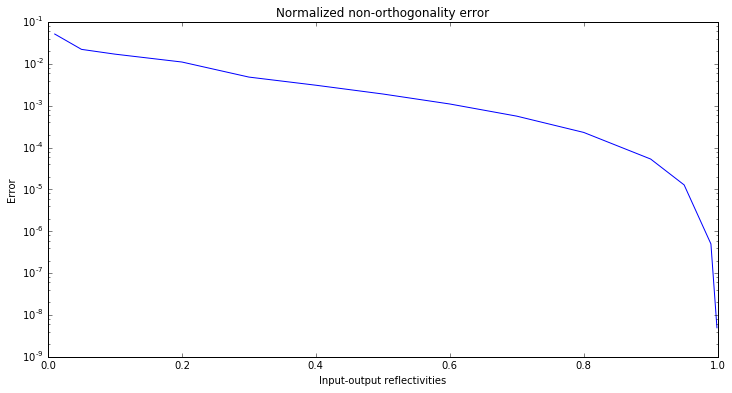

In [42]:
plt.figure(figsize = (12,6))
plt.plot(rs,[err[r] for r in rs])
plt.yscale('log')
plt.xlabel('Input-output reflectivities')
plt.title('Normalized non-orthogonality error')
plt.ylabel('Error')

## Varying r1 with constant r3=1

In [65]:
Ms0 = {}
for r in rs:
    Ms0[r] = run_example3(r1=r,r3=1.)

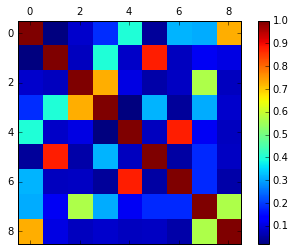

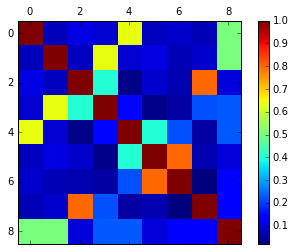

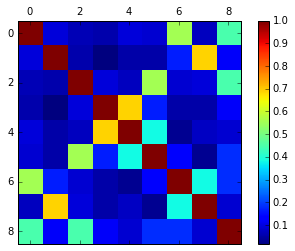

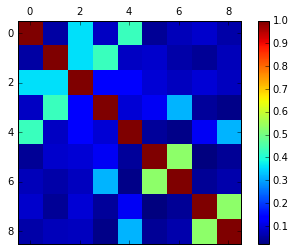

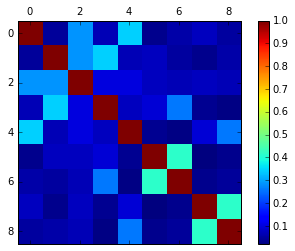

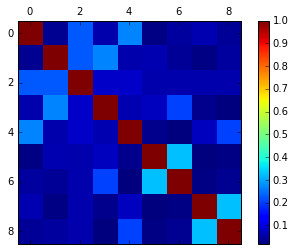

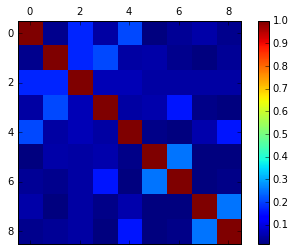

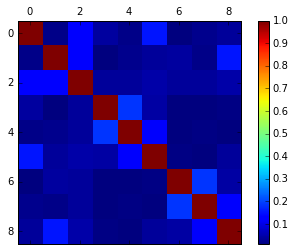

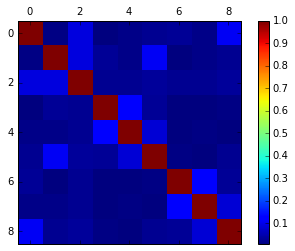

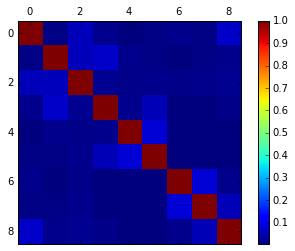

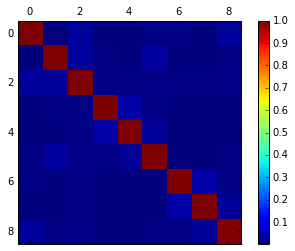

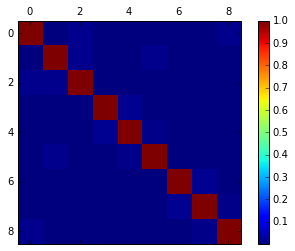

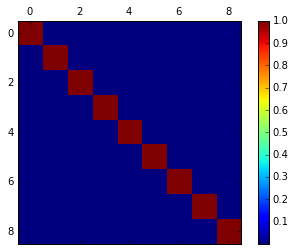

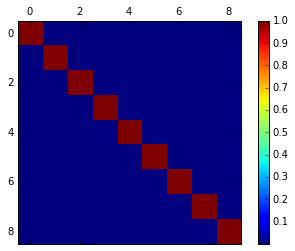

In [66]:
for r in rs:
    contour_plot(Ms0[r])

In [67]:
err0 = {}
for r in rs:
    dim = Ms0[r].shape[-1]
    err0[r] =  sum( (Ms0[r] - np.matrix(np.eye(dim)))**2 ).real/(dim*(dim-1))

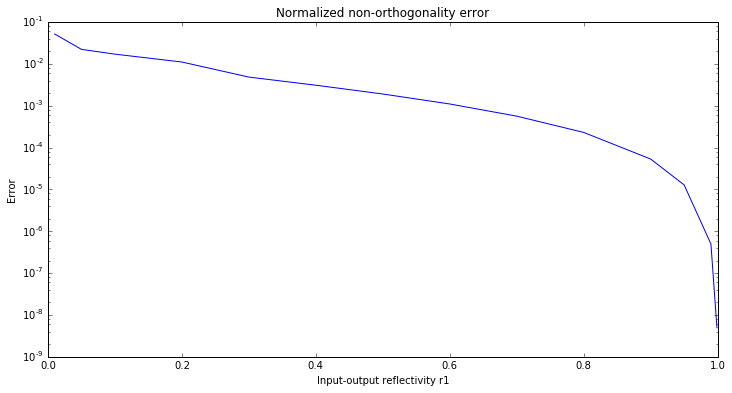

In [68]:
plt.figure(figsize = (12,6))
plt.plot(rs,[err[r] for r in rs])
plt.yscale('log')
plt.xlabel('Input-output reflectivity r1')
plt.title('Normalized non-orthogonality error')
plt.ylabel('Error')

## Varying r2-- the internal mirror

In [57]:
Ms2 = {}
for r in rs:
    Ms2[r] = run_example3(r1=.9,r2 = r,r3=.9)

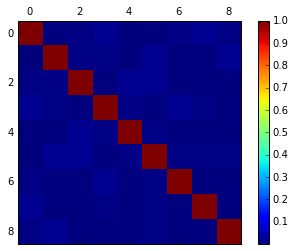

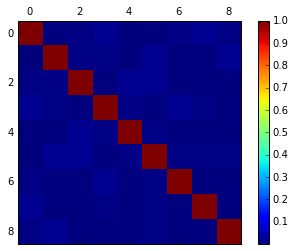

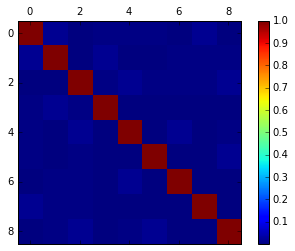

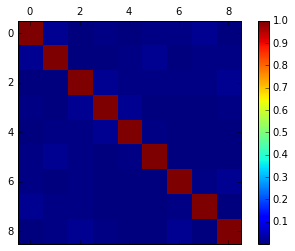

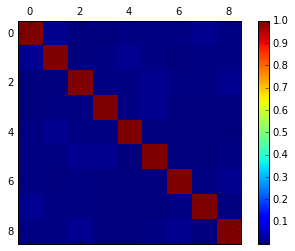

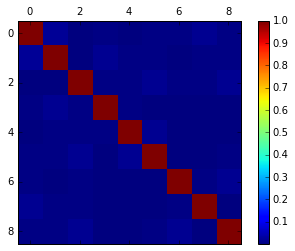

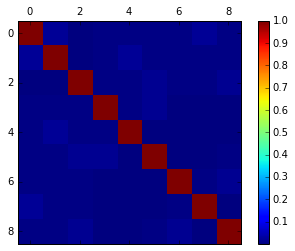

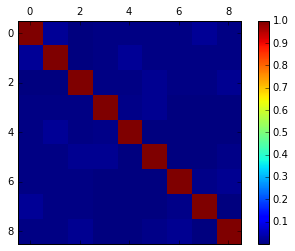

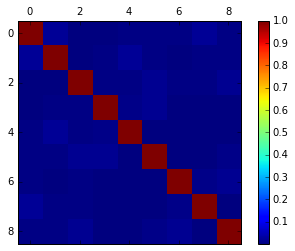

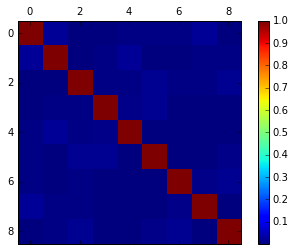

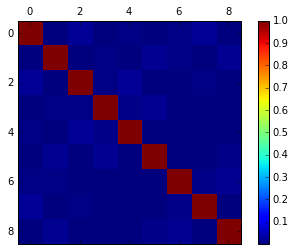

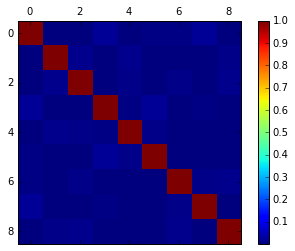

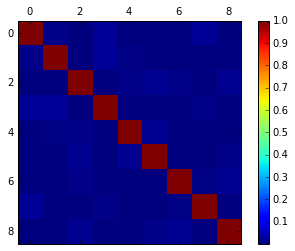

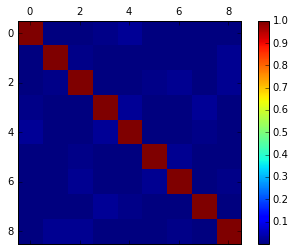

In [58]:
for r in rs:
    contour_plot(Ms2[r])

In [47]:
err2 = {}
for r in rs:
    dim = Ms2[r].shape[-1]
    err2[r] =  sum( (Ms2[r] - np.matrix(np.eye(dim)))**2 ).real/(dim*(dim-1))

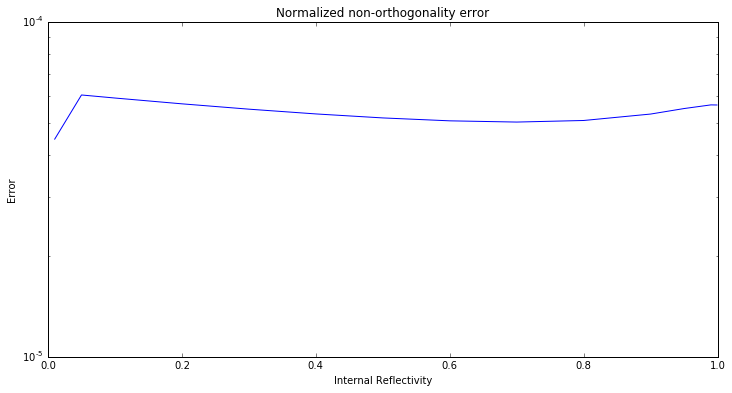

In [50]:
plt.figure(figsize = (12,6))
plt.plot(rs,[err2[r] for r in rs])
plt.yscale('log')
plt.xlabel('Internal Reflectivity')
plt.title('Normalized non-orthogonality error')
plt.ylabel('Error')

In [54]:
Ex = Examples.Example3(max_freq=50.,max_linewidth=35.)
Ex.run_Potapov()

In [55]:
Ex.roots

[(-0.64730355842777687-10.902666838843666j),
 (-0.64730355842777698+10.902666838843666j),
 (-0.45087872074777552+2.1711397553362308e-28j),
 (-0.5105771085024011+40.60160974850853j),
 (-0.6086462345196489+32.54511692752144j),
 (-0.4653993649571486+20.17673076387544j),
 (-0.5105771085024012-40.60160974850852j),
 (-0.60864623451965-32.54511692752144j),
 (-0.4653993649571485-20.17673076387544j)]